### 问题:

- 小明向他的女朋友仙仙求婚，在求婚戒指上刻了一个大大的爱心。仙仙看到爱心想考验一下小明，出了一道题。方程$(x^2 + y^2 - 1)^2 - x^2y^2=0$能画出一个美丽的爱心，现在给定一个点（X,Y）,其中$X\sim N(\mu_1, \delta_1^2)，Y\sim N(\mu_2, \delta_2^2)$。这个点在这个爱心里面的概率是多少?
    
- 画出爱心曲线

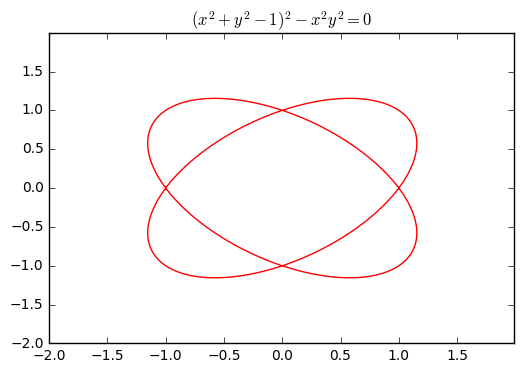

In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
# import random

"""
(x^2+y^2-1)^2 = x^2 * y^2'
"""

X = np.arange(-2.0, 2.0, 0.01)
Y = np.arange(-2.0, 2.0, 0.01)
 
x, y = np.meshgrid(X, Y)
f = (x ** 2 + y ** 2 - 1) ** 2 - x ** 2 * y ** 2
 
fig = plt.figure()
cs = plt.contour(x, y, f, 0, colors = 'r')
plt.title('$(x^2 + y^2 - 1)^2 - x^2y^2=0$')
_ = plt.show()

- 生成10000个X，Y服从正态分布的点

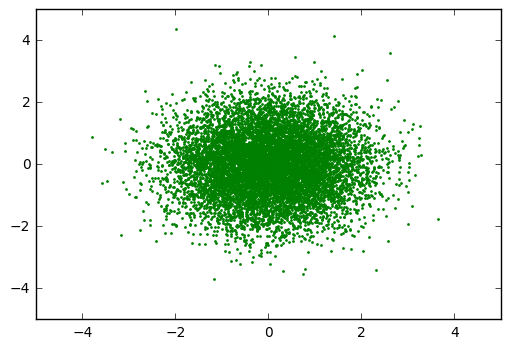

In [32]:
NUM_POINTS = 10000
mu_1 = 0
sigma_1 = 1
mu_2 = 0
sigma_2 = 1
rand_x = lambda: random.normal(mu_1, sigma_1)
rand_y = lambda: random.normal(mu_2, sigma_2)
points = [(rand_x(), rand_y()) for i in range(NUM_POINTS)]
(x, y ) = zip(*list(points))
plt.title('$X-N(0,1), Y-N(0,1)$,NUM_POINTS=10000')
_ = plt.scatter(x, y,s=1,color = 'g')

- 分成两种情况考虑落在爱心曲线内：
    - xy>=0的情况下（一、三象限），点在曲线内满足方程简化为：$$xy \geq 0, x^2 + y^2 -1 -xy \leq 0$$
    - xy<=0的情况下（二、四象限），点在曲线内满足方程简化为：$$xy < 0, x^2 + y^2 -1 +xy \leq 0$$
    
- 用（"落在曲线内点的数量"／"总点数"）近似为概率

In [84]:
def In_heartCurve_prob(mu_1, sigma_1, mu_2, sigma_2, NUM_POINTS=10000):

    rand_x = lambda: random.normal(mu_1, sigma_1)
    rand_y = lambda: random.normal(mu_2, sigma_2)
    points = [(rand_x(), rand_y()) for i in range(NUM_POINTS)]

    f_check_1 = lambda x, y: (x ** 2 + y ** 2 - 1) - x * y  
    f_check_2 = lambda x, y: (x ** 2 + y ** 2 - 1) + x * y 
    points_in = [point for point in points if 
            (point[0] * point[1] >= 0 and f_check_1(point[0], point[1]) <=0.0)
            or (point[0] * point[1] < 0 and f_check_2(point[0], point[1]) <=0.0)]

    points_out = list(set(points) - set(points_in))

    (in_x, in_y ) = zip(*list(points_in))
    (out_x, out_y ) = zip(*list(points_out))

    plt.title('$X-N(%f,%f), Y-N(%f,%f)$' % (mu_1, sigma_1**2, mu_2, sigma_2**2))
    plt.scatter(in_x, in_y,s=1,color = 'r')
    plt.scatter(out_x, out_y,s=1,color = 'black')
    _ = plt.show()
    
    print 'the probality of dot in heart curve: ',float(len(points_in))/NUM_POINTS 

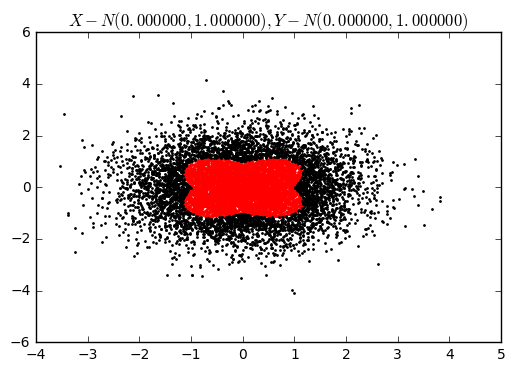

the probality of dot in heart curve:  0.5238


In [85]:
In_heartCurve_prob(0,1,0,1)

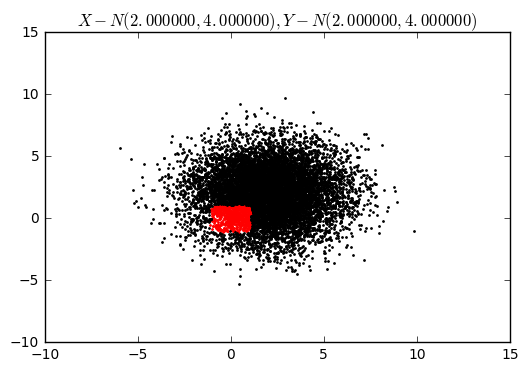

the probality of dot in heart curve:  0.0692


In [86]:
In_heartCurve_prob(2,2,2,2)